In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_csv("../sample_data/credit_scoring_dataset.csv")
data.head()

,age,gender,marital_status,employment_status,length_of_employment_years,monthly_net_income,number_of_credit_cards,previous_defaults,credit_amount,loan_duration_months,s_score,default
0,24,Female,Single,Student,0,526,1,1,300,12,1,1
1,26,Female,Single,Employed (Full-Time),10,4295,2,0,1300,8,1,0
2,34,Female,Married,Employed (Part-Time),5,1323,2,0,1000,2,4,0
3,37,Female,Divorced/Separated,Self-Employed,3,1799,1,3,600,2,3,0
4,57,Male,Married,Employed (Full-Time),20,5205,2,1,600,8,4,1


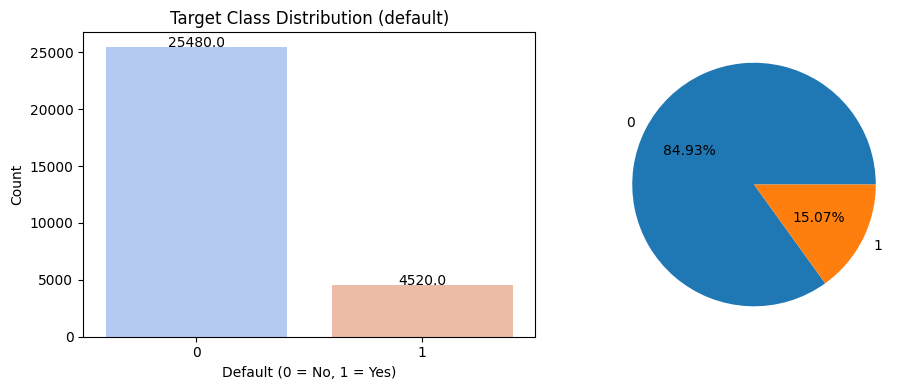

In [48]:
fig, ax = plt.subplots(1,2,figsize=(10, 4))
sns.countplot(x='default', data=data, palette='coolwarm', ax=ax[0])
ax[0].set_title('Target Class Distribution (default)')
ax[0].set_xlabel('Default (0 = No, 1 = Yes)')
ax[0].set_ylabel('Count')
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='baseline')
ax[1].pie(data.default.value_counts().values, labels=data.default.value_counts().index, autopct='%1.2f%%')
plt.tight_layout()
plt.show()

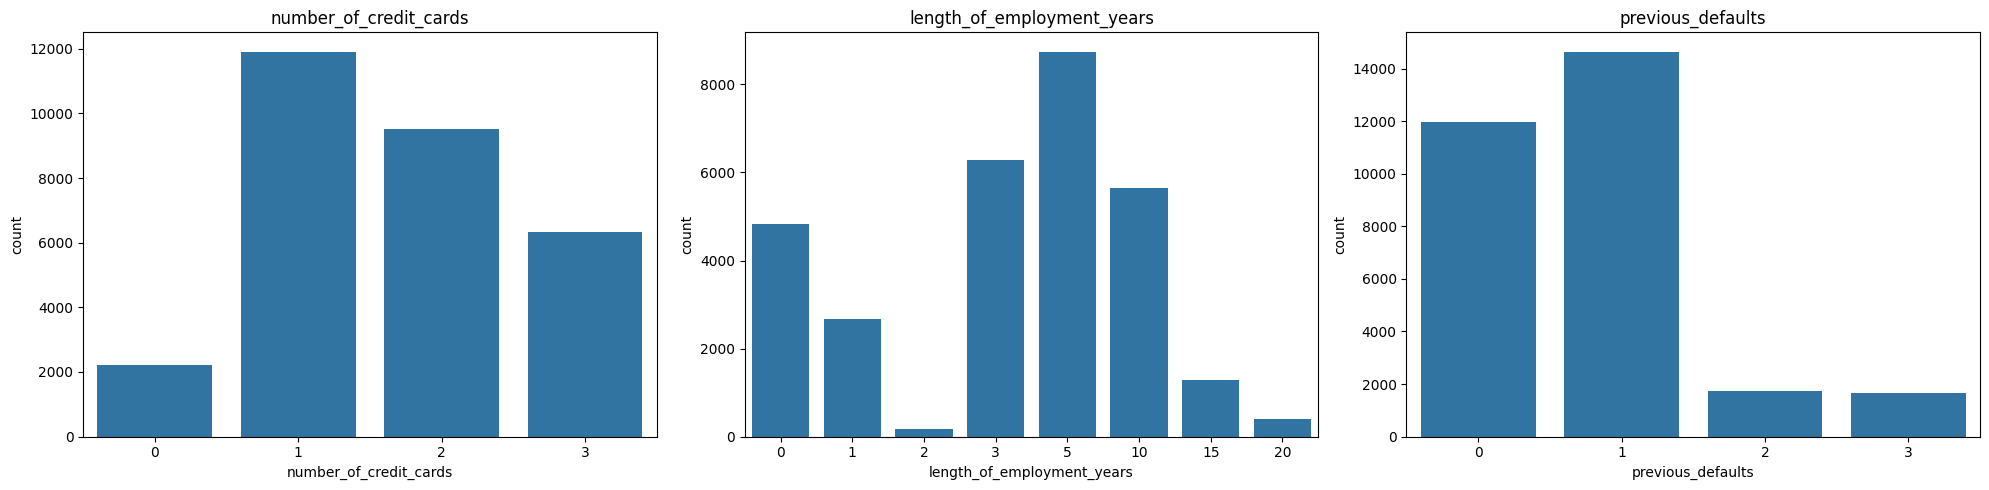

In [97]:
ordinal_cols = ['number_of_credit_cards','length_of_employment_years','previous_defaults']

o_cols = len(ordinal_cols)

fig, ax = plt.subplots(1,o_cols, figsize=(20, 5))

for i, col in enumerate(ordinal_cols):
    sns.countplot(data=data, x=col, ax=ax[i])
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

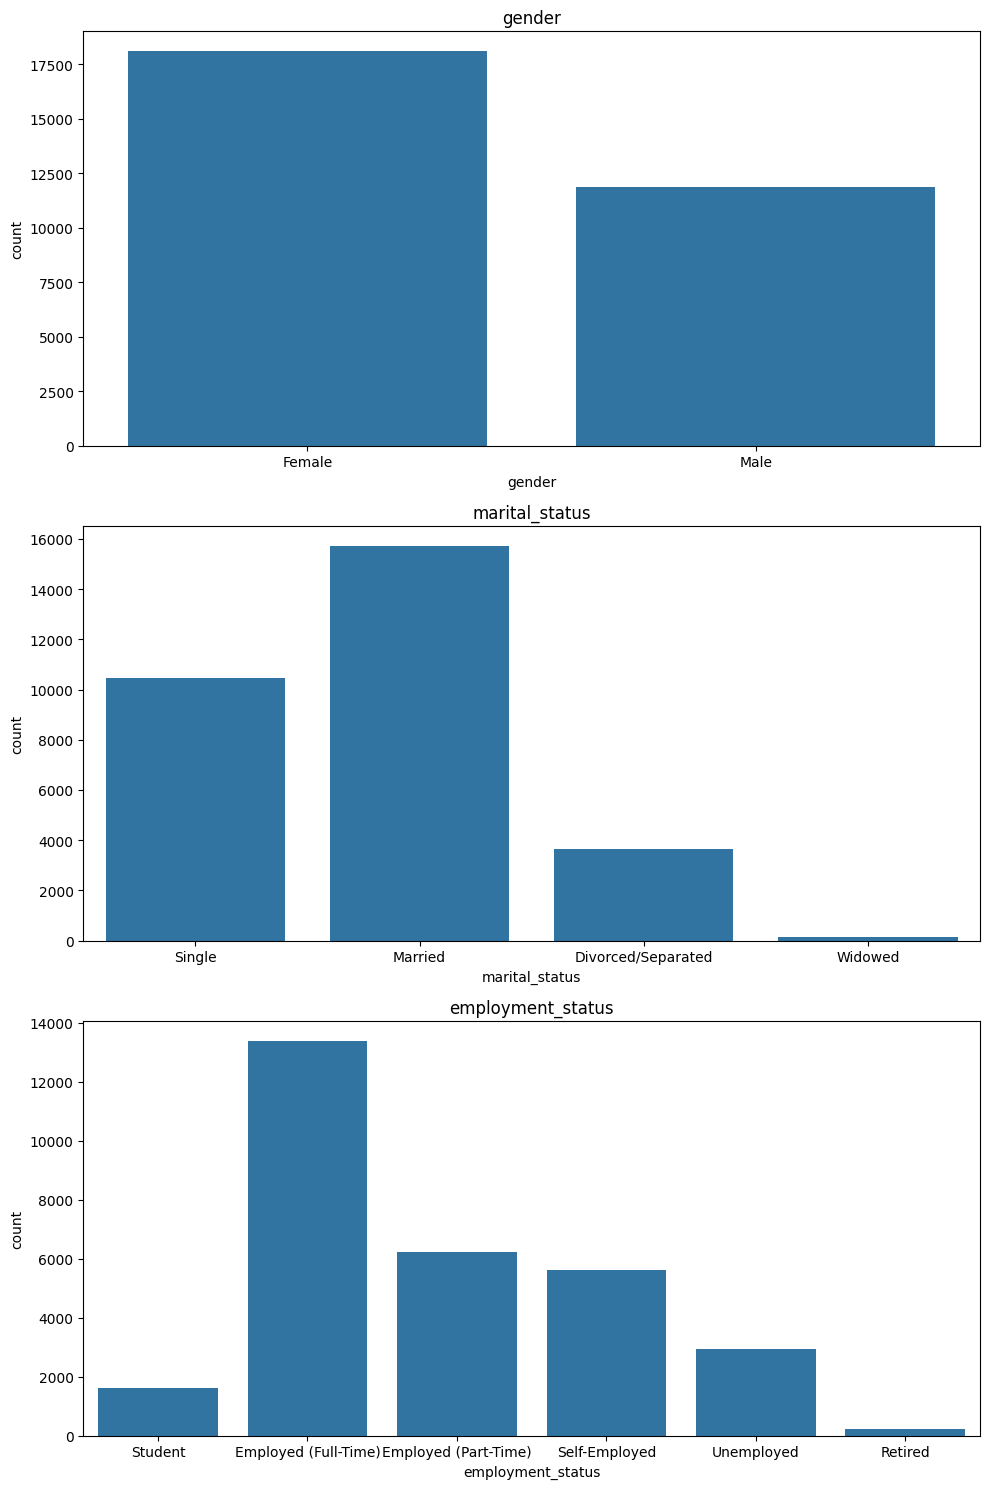

In [69]:
categorical_cols = data.select_dtypes(exclude=['number']).columns

n_cols = len(categorical_cols)

fig, ax = plt.subplots(n_cols,1, figsize=(10, 5*n_cols))

if n_cols == 1:
    ax = [ax]

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, ax=ax[i])
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_10868\507295379.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.monthly_net_income,ax=ax[0])


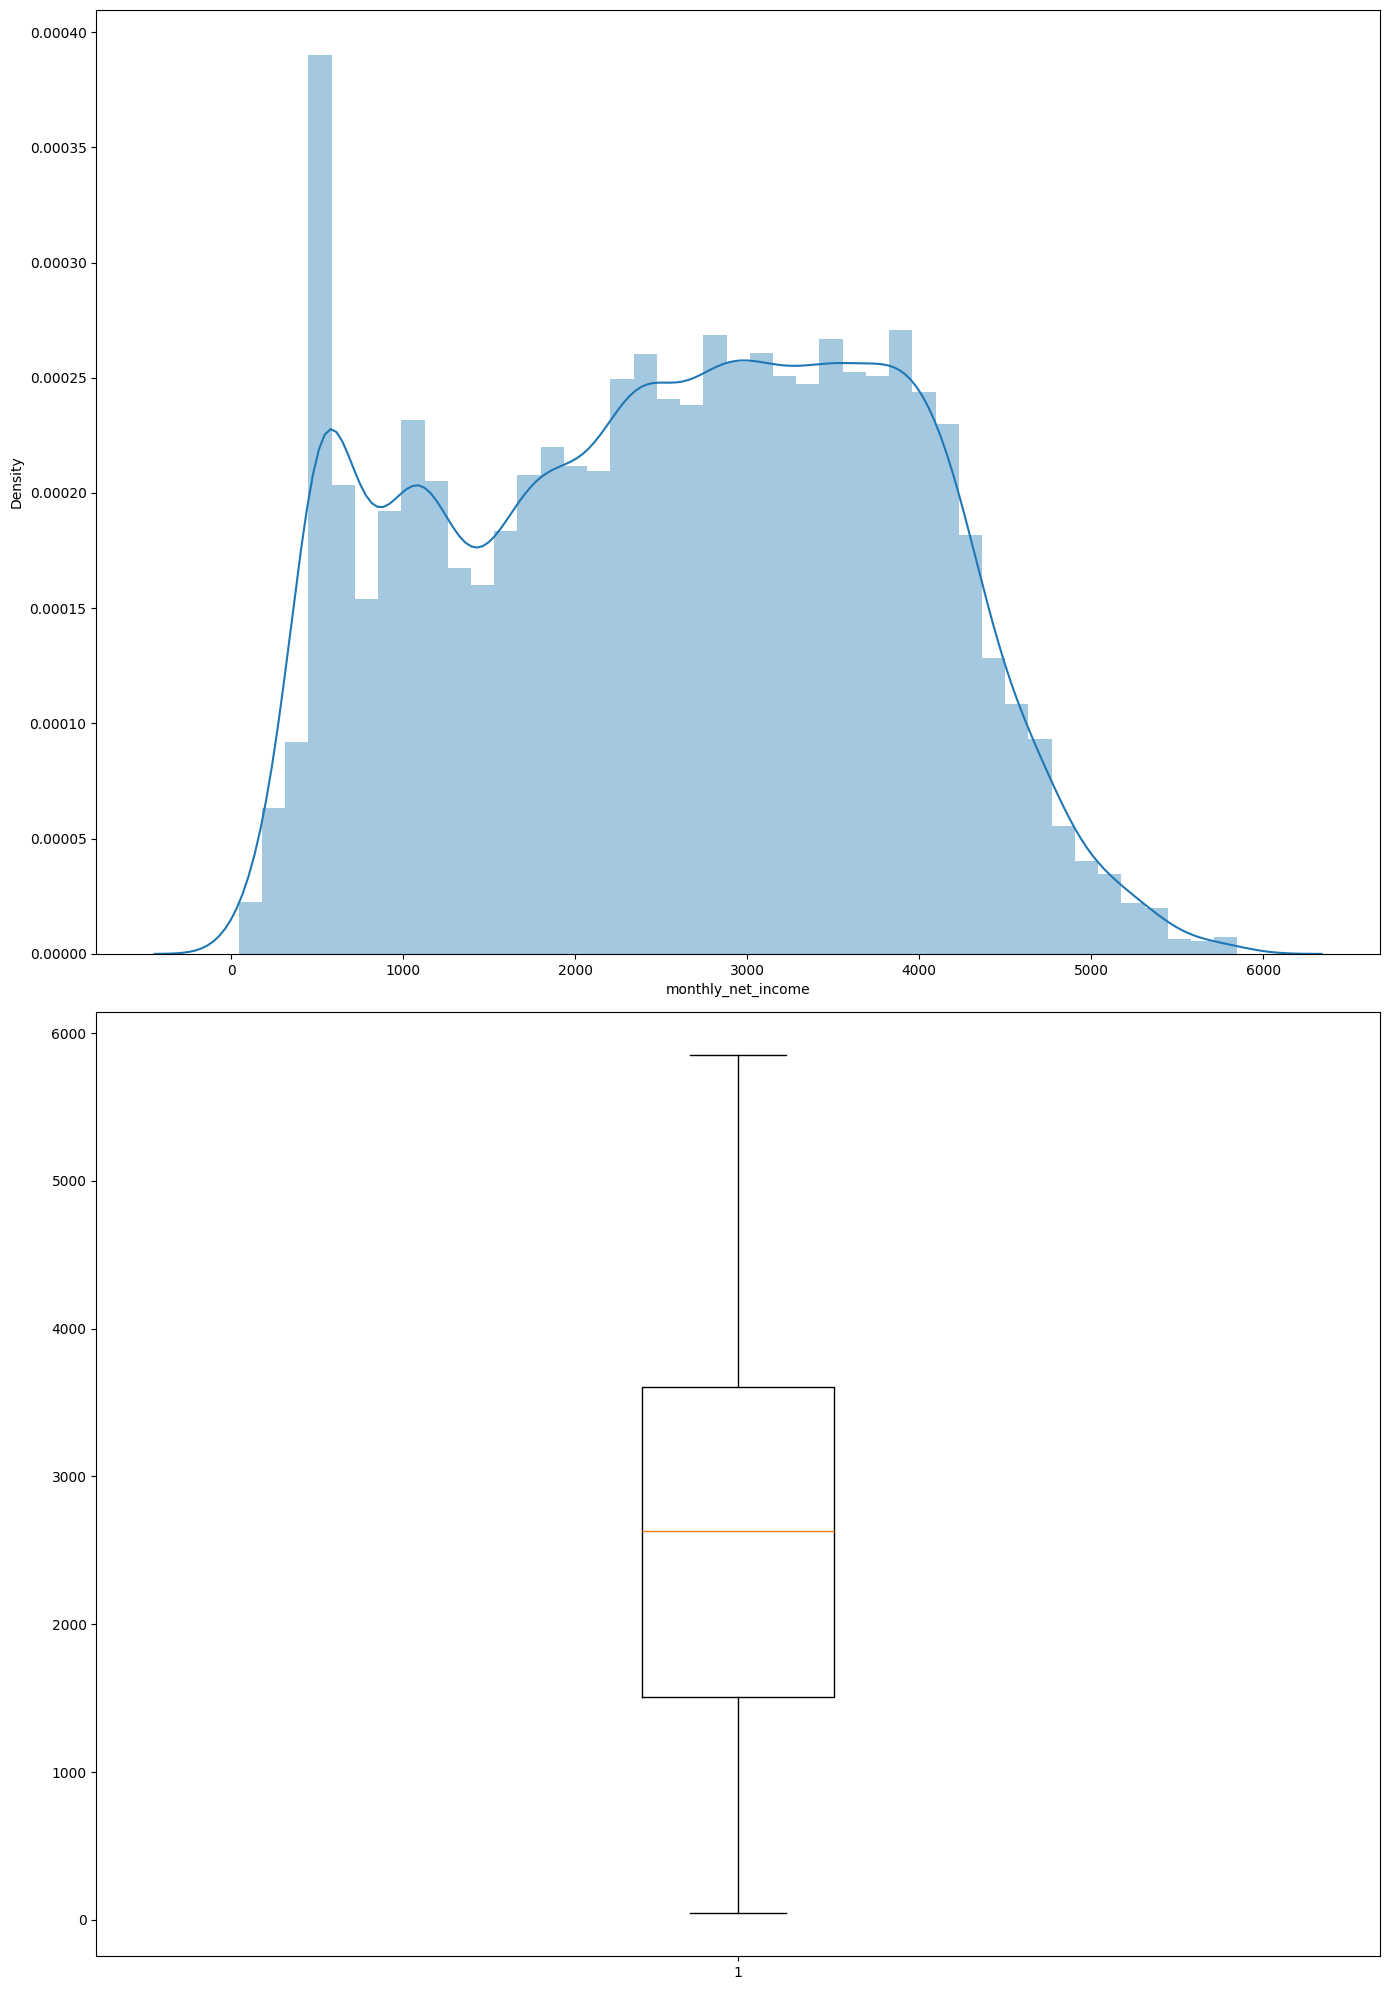

In [85]:
fg, ax = plt.subplots(2,1,figsize=(14,20))
sns.distplot(data.monthly_net_income,ax=ax[0])
ax[1].boxplot(data.monthly_net_income)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'monthly_net_income'}, xlabel='employment_status'>

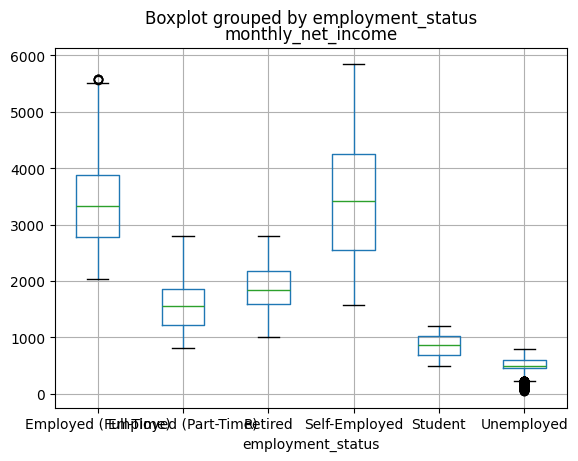

In [ ]:
data.boxplot(column="monthly_net_income", by="employment_status")

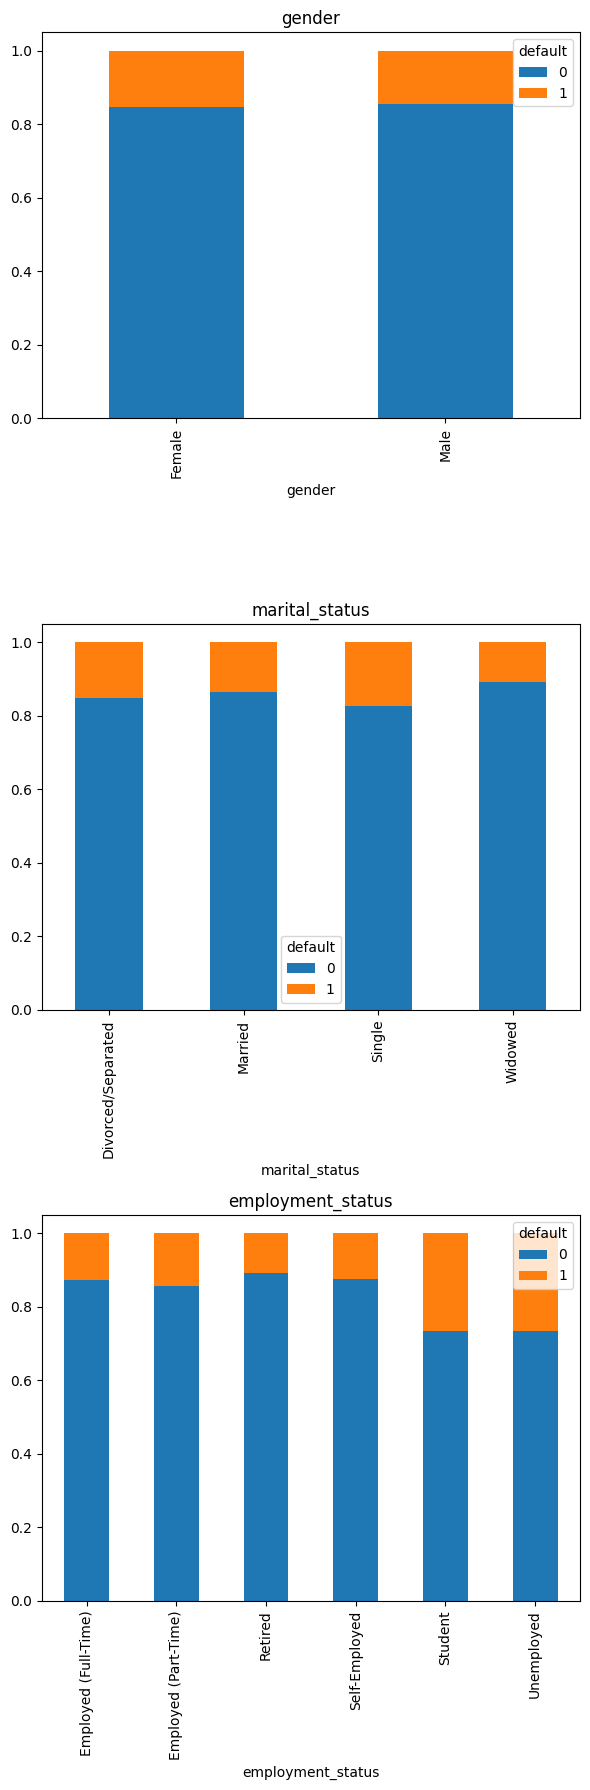

In [106]:
fig, axes = plt.subplots(n_cols, 1, figsize=(6,6*n_cols))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ct = pd.crosstab(data[col], data.default)
    ct = ct.div(ct.sum(axis=1), axis=0)
    
    ct.plot(kind="bar", stacked=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

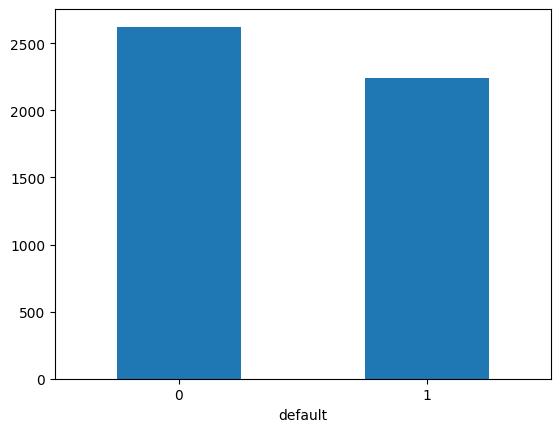

In [116]:
data.groupby('default')['monthly_net_income'].mean().plot.bar()
plt.tick_params(axis='x', rotation=0)
plt.show()

In [ ]:
X = data.drop('default', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, data.default, test_size=0.3, random_state=42, stratify=data.default)

In [ ]:
# Stratification Confirmation
# Check the class distribution in the original data
print("Original Class Distribution:")
print(data.default.value_counts(normalize=True))

print("\nTraining Set Class Distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest Set Class Distribution:")
print(y_test.value_counts(normalize=True))

Original Class Distribution:
default
0    0.849333
1    0.150667
Name: proportion, dtype: float64

Training Set Class Distribution:
default
0    0.849333
1    0.150667
Name: proportion, dtype: float64

Test Set Class Distribution:
default
0    0.849333
1    0.150667
Name: proportion, dtype: float64


In [26]:
# Preprocessing: One-hot encode categorical features and scale numerical features

# Separate numerical and categorical columns
numeric_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(exclude=['number']).columns

When training a machine learning model,
you should perform one-hot encoding of categorical features and scaling of numerical features
only on the training dataset, not on the whole dataset.
This approach is crucial to prevent data leakage and maintain the integrity of your model evaluation.

You should treat the test set as if you didn't have it during training.
Before making predictions with the test set,
you should apply the same transformations that were applied to the training set.

In [36]:
scaler = StandardScaler()
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])

In [25]:
x_train.head()

,age,gender,marital_status,employment_status,length_of_employment_years,monthly_net_income,number_of_credit_cards,previous_defaults,credit_amount,loan_duration_months,s_score
6552,-0.600222,Female,Single,Employed (Full-Time),-0.460939,0.488437,0.368669,-0.971031,0.495401,0.514188,0.707185
22149,-0.709164,Female,Single,Employed (Full-Time),-0.931389,0.778174,0.368669,-0.971031,1.160242,0.514188,-0.001383
29424,-0.600222,Male,Married,Employed (Full-Time),0.009510,0.985911,1.491195,-0.971031,-0.677847,-1.699339,0.707185
5142,1.360745,Female,Married,Employed (Full-Time),0.009510,1.357650,0.368669,0.292705,-0.834281,-0.961497,-0.001383
18345,-1.471762,Female,Single,Employed (Part-Time),-0.931389,-0.794689,0.368669,0.292705,-1.147147,1.989874,0.707185


In [37]:
# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_train_categorical = encoder.fit_transform(x_train[categorical_columns])
encoded_test_categorical = encoder.transform(x_test[categorical_columns])

# Convert the encoded categorical data (a numpy array) into a DataFrame with proper column names
encoded_train_df = pd.DataFrame(encoded_train_categorical, columns=encoder.get_feature_names_out(categorical_columns))
encoded_test_df = pd.DataFrame(encoded_test_categorical, columns=encoder.get_feature_names_out(categorical_columns))

In [32]:
encoded_train_df.head()

,gender_Male,marital_status_Married,marital_status_Single,marital_status_Widowed,employment_status_Employed (Part-Time),employment_status_Retired,employment_status_Self-Employed,employment_status_Student,employment_status_Unemployed
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
# Combine processed numerical and categorical data
X_train_processed = pd.concat([x_train[numeric_columns].reset_index(drop=True), encoded_train_df.reset_index(drop=True)], axis=1)
X_test_processed = pd.concat([x_test[numeric_columns].reset_index(drop=True), encoded_test_df.reset_index(drop=True)], axis=1)

In [34]:
X_train_processed.head()

,age,length_of_employment_years,monthly_net_income,number_of_credit_cards,previous_defaults,credit_amount,loan_duration_months,s_score,gender_Male,marital_status_Married,marital_status_Single,marital_status_Widowed,employment_status_Employed (Part-Time),employment_status_Retired,employment_status_Self-Employed,employment_status_Student,employment_status_Unemployed
0,-0.600222,-0.460939,0.488437,0.368669,-0.971031,0.495401,0.514188,0.707185,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.709164,-0.931389,0.778174,0.368669,-0.971031,1.160242,0.514188,-0.001383,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.600222,0.009510,0.985911,1.491195,-0.971031,-0.677847,-1.699339,0.707185,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.360745,0.009510,1.357650,0.368669,0.292705,-0.834281,-0.961497,-0.001383,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.471762,-0.931389,-0.794689,0.368669,0.292705,-1.147147,1.989874,0.707185,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
# Train logistic regression
clf = LogisticRegression()
clf.fit(X_train_processed, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [40]:
# Make predictions on the test set
y_pred = clf.predict(X_test_processed)  # Predicted class labels
y_pred_proba = clf.predict_proba(X_test_processed)[:, 1]  # Predicted probabilities for the positive class (default = 1)

In [41]:
y_pred, y_pred_proba

(array([0, 0, 0, ..., 0, 0, 0], shape=(9000,)),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        4.41629635e-246, 1.66063920e-244, 0.00000000e+000], shape=(9000,)))

In [21]:
# Predict probabilities
# y_pred_proba = clf.predict_proba(X_test_processed)[:, 1]

# clf.predict_proba(X_test_processed):
# This method of the LogisticRegression model returns the predicted probabilities for each class in the target variable.
# For a binary classification problem (like predicting default/no default), the model outputs two probabilities:
# The probability that the sample belongs to class 0 (no default).
# The probability that the sample belongs to class 1 (default).


# The output of predict_proba(X_test) is a 2D NumPy array where:
# Each row corresponds to a sample (a data point in X_test).
# The first column ([:, 0]) represents the probability of class 0.
# The second column ([:, 1]) represents the probability of class 1.

# [:, 1]:
# This is a way to select the second column from the array,
# which contains the probabilities of the positive class (in this case, "default" or class 1).
# : selects all rows (for all test samples).
# 1 selects the second column, which corresponds to the predicted probability that each sample belongs to class 1 (default).

In [47]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8493

Confusion Matrix:
[[7644    0]
 [1356    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      7644
           1       0.00      0.00      0.00      1356

    accuracy                           0.85      9000
   macro avg       0.42      0.50      0.46      9000
weighted avg       0.72      0.85      0.78      9000



a:\data-science\explore-models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
a:\data-science\explore-models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
a:\data-science\explore-models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.sh

In [48]:
accuracy, conf_matrix

(0.8493333333333334,
 array([[7644,    0],
        [1356,    0]]))

In [49]:
print(class_report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      7644
           1       0.00      0.00      0.00      1356

    accuracy                           0.85      9000
   macro avg       0.42      0.50      0.46      9000
weighted avg       0.72      0.85      0.78      9000



In [60]:
# Get coefficients and intercept
[ coefficients ] = clf.coef_
[ intercept ] = clf.intercept_

# Combine coefficients with feature names
feature_names = list(X_train_processed.columns)
equation = f"Default = {intercept:.4f} + " + " + ".join(
    [f"({coefficients[i]:.4f} * {feature_names[i]})" for i in range(len(feature_names))]
)

print("Logistic Regression Equation:")
print(equation)

Logistic Regression Equation:
Default = -3.2162 + (0.0454 * age) + (-0.3522 * length_of_employment_years) + (0.0254 * monthly_net_income) + (-0.0011 * number_of_credit_cards) + (0.7171 * previous_defaults) + (-1.0162 * credit_amount) + (2.6316 * loan_duration_months) + (-0.1398 * s_score) + (0.1145 * gender_Male) + (-0.1622 * marital_status_Married) + (-0.0145 * marital_status_Single) + (-0.4834 * marital_status_Widowed) + (0.1698 * employment_status_Employed (Part-Time)) + (0.6668 * employment_status_Retired) + (0.0719 * employment_status_Self-Employed) + (1.0063 * employment_status_Student) + (0.5377 * employment_status_Unemployed)


In [72]:
# Manually calculate predictions for each row in the test set

# We will calculate the log-odds (linear combination of features and coefficients)

X_test_values = X_test_processed.values
log_odds = np.dot(X_test_values, coefficients) + intercept  # Linear combination of features
manual_predictions_proba = 1 / (1 + np.exp(-log_odds))  # Convert log-odds to probability using sigmoid

C:\Users\aryan\AppData\Local\Temp\ipykernel_18900\750063667.py:7: RuntimeWarning: overflow encountered in exp
  manual_predictions_proba = 1 / (1 + np.exp(-log_odds))  # Convert log-odds to probability using sigmoid


In [73]:
# Compare with predictions from the model (clf.predict_proba)
model_predictions_proba = clf.predict_proba(X_test_processed)[:, 1]

In [74]:
# Compare results
np.allclose(manual_predictions_proba, model_predictions_proba)

# np.allclose is a function in NumPy that is used to check whether two arrays (or values) are element-wise equal within a specified tolerance.
# It returns True if the arrays (or values) are "close enough" to each other, and False otherwise.

True

In [75]:
# Compare results
comparison = np.allclose(manual_predictions_proba, model_predictions_proba)

# Check if the manual predictions and model predictions match closely
print("\nDo the manual predictions match the model predictions? ", comparison)


Do the manual predictions match the model predictions?  True


In [76]:
# Print out a few examples to compare
print("\nComparing manual predictions with model predictions:")
for i in range(5):  # Show the first 5 comparisons
    print(f"Manual Prediction: {manual_predictions_proba[i]:.4f}, Model Prediction: {model_predictions_proba[i]:.4f}")


Comparing manual predictions with model predictions:
Manual Prediction: 0.0000, Model Prediction: 0.0000
Manual Prediction: 0.0000, Model Prediction: 0.0000
Manual Prediction: 0.0000, Model Prediction: 0.0000
Manual Prediction: 0.0000, Model Prediction: 0.0000
Manual Prediction: 0.0000, Model Prediction: 0.0000
